In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw 
from skimage.io import imread
from skimage import io,data
import imutils

In [4]:
image = Image.open("02_orig.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

In [5]:
# Преобразование изображения в Черно-белое
for i in range(width):
	for j in range(height):
		a = pix[i, j][0]
		b = pix[i, j][1]
		c = pix[i, j][2]
		S = (a + b + c) // 3
		draw.point((i, j), (S, S, S))
image.save("02.jpg", "JPEG")
del draw

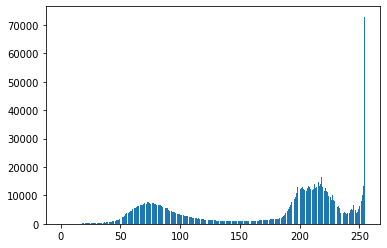

True

In [15]:
# Нормализация гистограммы
def hist_normalization(img, a=0, b=255):
	c = img.min()
	d = img.max()
	out = img.copy()
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	return out
img = cv2.imread("test1.jpg",0).astype(np.float64)
out = hist_normalization(img)
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("test1_hist.jpg")
plt.show()
cv2.imwrite("test2_norm.jpg", out)

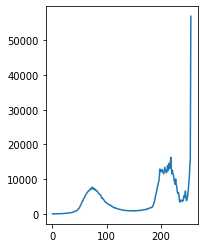

True

In [20]:
# Эквилизация гистограммы
wiki_img=cv2.imread('test1.jpg')
wiki_gray=cv2.cvtColor(wiki_img,cv2.COLOR_BGR2GRAY)
wiki_equ=cv2.equalizeHist(wiki_gray)
hist=cv2.calcHist([wiki_gray],[0],None,[256],[0,256])
equ_hist=cv2.calcHist([wiki_equ],[0],None,[256],[0,256])
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
x = np.arange(0,256,0.001)
y = np.sin(x/81)*13000
y_masked = np.ma.masked_where(y < -0.5, y)
ax1.plot(hist)
#ax1.plot(x,y_masked )
#ax2=fig.add_subplot(1,2,2)
#ax2.plot(equ_hist)
plt.show()
cv2.imwrite("01_eq.jpg",wiki_equ )

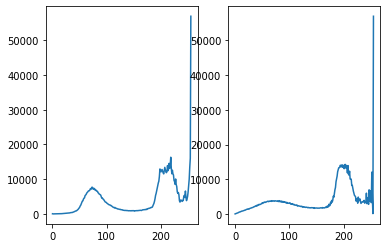

True

In [21]:
# Преобразование по заданной функции.
img = cv2.imread('test1.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
hist=cv2.calcHist([img],[0],None,[256],[0,256])
equ_hist=cv2.calcHist([cl1],[0],None,[256],[0,256])
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.plot(hist)
ax2=fig.add_subplot(1,2,2)
ax2.plot(equ_hist)
plt.show()
cv2.imwrite('clahe_1.jpg',cl1)